## EDA AirBnB NYC 2019

In [1]:
import pandas as pd
import numpy as np
import os as os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#### Load DS from URL

In [2]:
url = "https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv"
df = pd.read_csv(url)

#### Create directory to store data

In [3]:
os.makedirs('./data/raw', exist_ok=True)

#### Save dataset to a CSV file in the specified directory

In [4]:
df.to_csv('./data/raw/AB_NYC_2019.csv', index=False)

#### Confirgurar visualizaciones

In [6]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [8]:

# ======================
# 2. Vista general
# ======================
print("\nDimensiones del dataset:", df.shape)
print("\nPrimeras filas:")
print(df.head())



Dimensiones del dataset: (48895, 16)

Primeras filas:
     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Pri

In [9]:

# ======================
# 3. Información general y valores nulos
# ======================
print("\nInformación general:")
df.info()

print("\nValores nulos por columna:")
print(df.isnull().sum())

# Conclusión:
# - 'name' y 'host_name' tienen valores nulos pero no se usarán en el modelo, así que podemos eliminarlos.
# - 'last_review' y 'reviews_per_month' sí pueden ser relevantes, se imputará o eliminará según análisis.



Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_revie

#### Eliminar columnas no necesarias

In [17]:
df.drop(columns=['name','host_name'], inplace=True)

# Justificación: 'name' y 'host_name' no son útiles para el modelo y solo agregan ruido/noise.

KeyError: "['name', 'host_name'] not found in axis"

In [19]:

# ======================
# 5. Eliminar valores nulos restantes
# ======================
df.dropna(inplace=True)

# Conclusión: eliminamos registros incompletos para asegurar calidad en el análisis y modelado.


In [20]:

# ======================
# 6. Analizar y limpiar outliers en el precio
# ======================
print("\nEstadísticas de precio:")
print(df['price'].describe())



Estadísticas de precio:
count    38843.000000
mean       142.317947
std        196.945624
min          0.000000
25%         69.000000
50%        101.000000
75%        170.000000
max      10000.000000
Name: price, dtype: float64


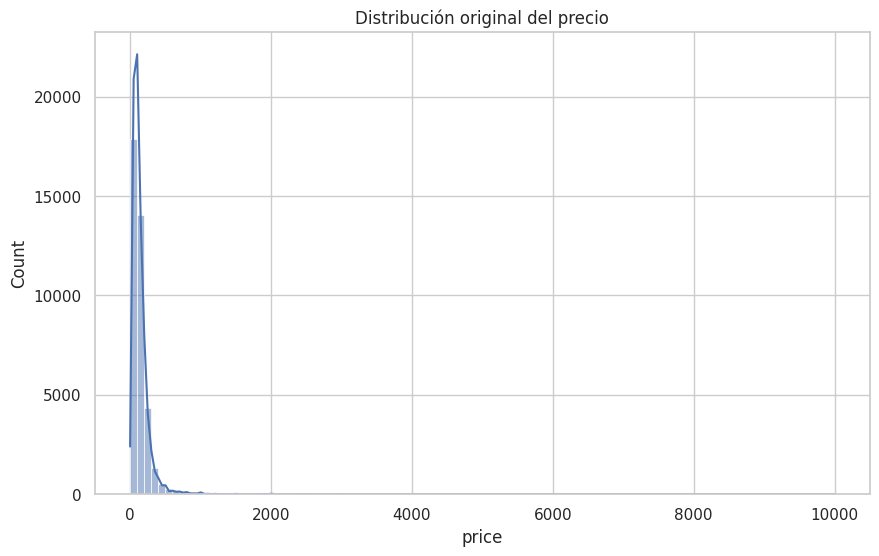

In [21]:

# Visualización del precio
sns.histplot(df['price'], bins=100, kde=True)
plt.title("Distribución original del precio")
plt.show()


In [22]:

# Remover outliers extremos
# Eliminamos precios 0 (inválidos) y > 1000 (extremos)
df = df[df['price'] > 0]
df = df[df['price'] < 1000]

# Conclusión: se eliminan registros con precios irreales para evitar sesgo y mejorar visualización/modelo


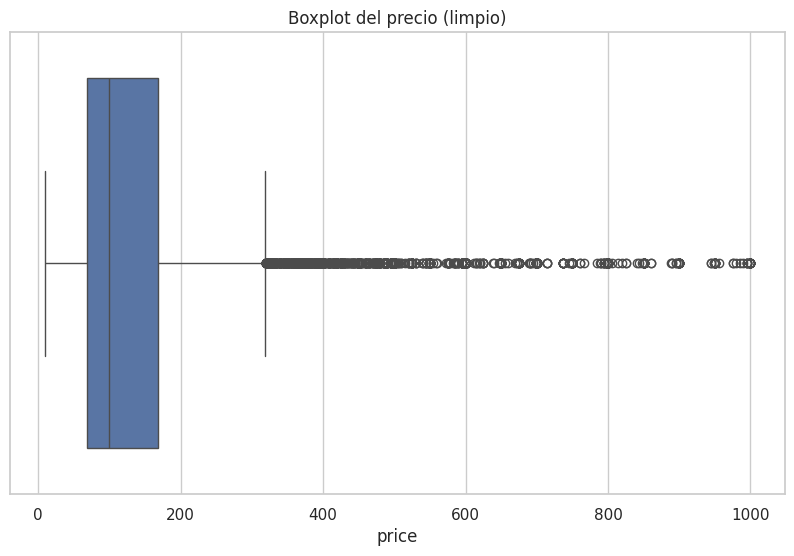

In [23]:

sns.boxplot(x=df['price'])
plt.title("Boxplot del precio (limpio)")
plt.show()


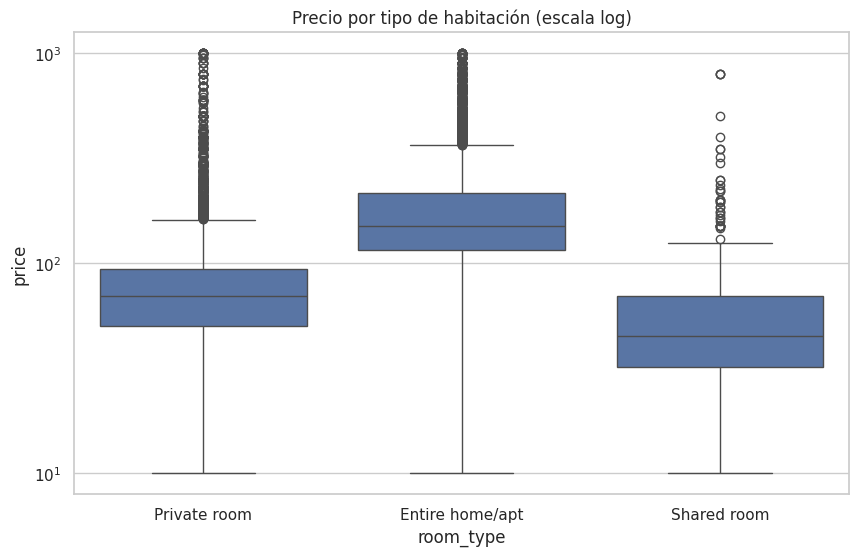

In [24]:

# ======================
# 7. Análisis por variables categóricas
# ======================
# Precio por tipo de habitación
sns.boxplot(data=df, x='room_type', y='price')
plt.yscale('log')
plt.title("Precio por tipo de habitación (escala log)")
plt.show()

# Conclusión: los alojamientos "Entire home/apt" tienen mayores precios en promedio.


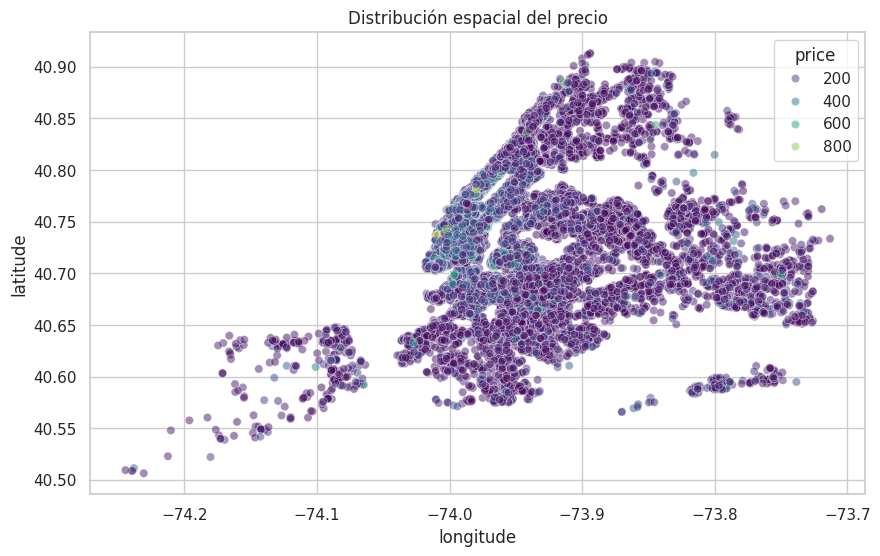

In [25]:

# ======================
# 8. Análisis espacial
# ======================
sns.scatterplot(data=df, x='longitude', y='latitude', hue='price', palette='viridis', alpha=0.5)
plt.title("Distribución espacial del precio")
plt.show()

# Conclusión: los precios más altos se concentran en Manhattan.


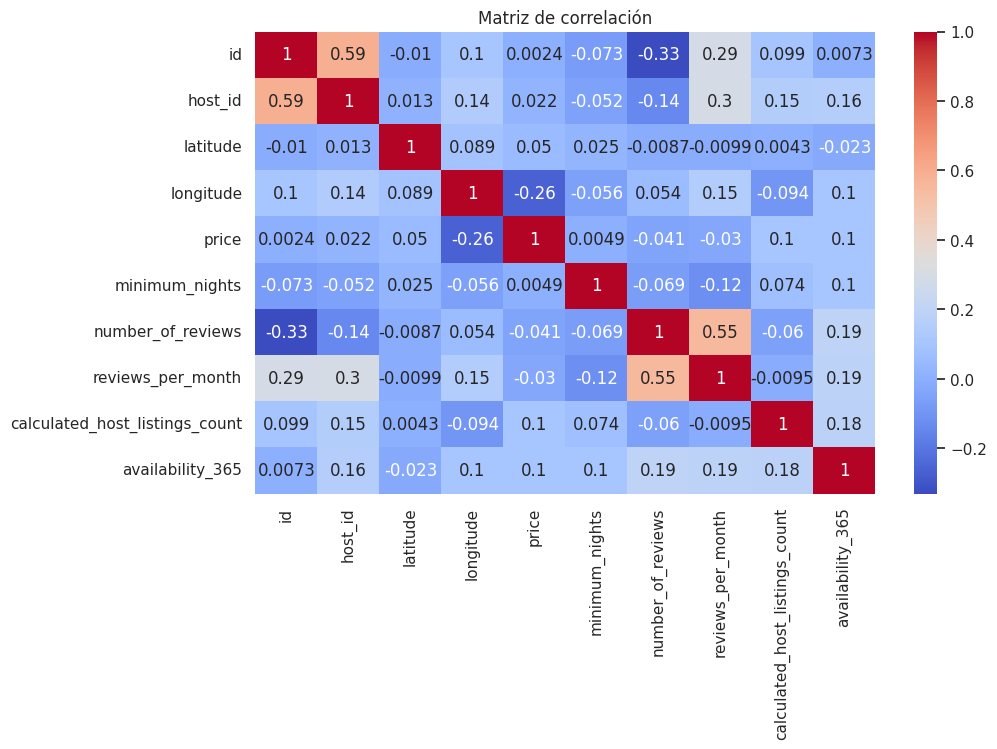

In [26]:

# ======================
# 9. Correlación de variables numéricas
# ======================
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Matriz de correlación")
plt.show()


In [27]:

# ======================
# 10. Preparación para modelado
# ======================


In [28]:
# Codificar variables categóricas
df_encoded = pd.get_dummies(df, columns=['neighbourhood_group', 'room_type'], drop_first=True)


In [29]:

# Separar variables predictoras y target
X = df_encoded.drop(columns=['price', 'last_review'])  # 'last_review' es fecha, no útil sin procesamiento
y = df_encoded['price']


In [30]:
# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:

# ======================
# 11. Modelado con Regresión Lineal
# ======================
model = LinearRegression()
model.fit(X_train, y_train)


ValueError: could not convert string to float: 'Greenwich Village'

In [ ]:

# Predicción y evaluación
y_pred = model.predict(X_test)

print("\nEvaluación del modelo:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))


In [ ]:

# ======================
# 12. Conclusión Final
# ======================
# - Se eliminaron columnas irrelevantes ('name', 'host_name') para reducir ruido.
# - Se limpiaron valores nulos y outliers para tener datos más representativos.
# - Se analizó la distribución del precio y su relación con ubicación y tipo de habitación.
# - Se construyó un modelo de regresión lineal con métricas razonables.
# - El modelo puede ser mejorado usando técnicas avanzadas (árboles, random forest, XGBoost, etc.)

# El EDA permitió comprender el negocio (Airbnb NYC), descubrir patrones y preparar datos limpios para modelado.